In [0]:
!git clone "https://github.com/convman/Multimodal.git"

Cloning into 'Multimodal'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 232 (delta 13), reused 36 (delta 9), pack-reused 189
Receiving objects: 100% (232/232), 612.67 MiB | 30.09 MiB/s, done.
Resolving deltas: 100% (79/79), done.
Checking out files: 100% (87/87), done.


In [0]:
cd Multimodal/iemocap/

/content/Multimodal/iemocap


In [0]:
import numpy as np
Test_visual = np.load("./dataset/Test_visual.npy")
Test_audio = np.load("./dataset/Test_audio.npy")
Test_text = np.load("./dataset/Test_text.npy")
Train_visual = np.load("./dataset/Train_visual.npy")
Train_audio = np.load("./dataset/Train_audio.npy")
Train_text = np.load("./dataset/Train_text.npy")
Train_labels = np.load("./dataset/Train_labels.npy")
Test_labels = np.load("./dataset/Test_labels.npy")

In [99]:
Train_concat = np.concatenate((Train_audio,Train_text,Train_visual),axis=-1)
Test_concat = np.concatenate((Test_audio,Test_text,Test_visual),axis=-1)
print(Train_concat.shape)
print(Test_concat.shape)

(5810, 712)
(1623, 712)


In [0]:
import pandas as pd
import numpy as np
import h5py
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

import keras
import tensorflow as tf
from time import time
from keras import layers
from google.colab import files	
from keras.models import load_model
from keras.models import Model,Sequential,Model
from keras.layers import *
from keras.callbacks import TensorBoard
from keras import callbacks
from keras.callbacks import *
%matplotlib inline  

In [0]:
print(Train_audio.shape)
print(Train_text.shape)
print(Train_visual.shape)
print(Train_labels.shape)

(5810, 100)
(5810, 100)
(5810, 512)
(5810, 6)


In [0]:
def resnet(y,units=32):
    x = Dense(units,activation='relu')(y)
    x = Dense(units,activation='relu')(x)
    x = layers.add([x,y])
    return x
    

In [0]:
i_a = Input(shape=(100,))
y_a = Dense(64)(i_a)
y_a = LeakyReLU(0.3)(y_a)
y_a = Dense(64)(y_a)
y_a = LeakyReLU(0.3)(y_a)
y_a = Dropout(rate=0.3)(y_a)
y_a = Dense(32)(y_a)
y_a = LeakyReLU(0.3)(y_a)
y_a = Dense(6,activation='softmax')(y_a)
model_a = Model(i_a,y_a)
print(model_a.summary())
model_a.compile('adam','categorical_crossentropy',metrics=['accuracy'],)
es = EarlyStopping(monitor='val_acc',mode='max' ,patience=5, min_delta=0.0001,verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.2,patience=2,min_lr=0.00001)
model_a.fit(Train_audio,Train_labels,128,epochs=20,validation_split=0.1,callbacks=[es,reduce_lr])
print(model_a.evaluate(Test_audio,Test_labels))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_49 (InputLayer)        (None, 100)               0         
_________________________________________________________________
dense_242 (Dense)            (None, 64)                6464      
_________________________________________________________________
leaky_re_lu_39 (LeakyReLU)   (None, 64)                0         
_________________________________________________________________
dense_243 (Dense)            (None, 64)                4160      
_________________________________________________________________
leaky_re_lu_40 (LeakyReLU)   (None, 64)                0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_244 (Dense)            (None, 32)                2080      
__________

In [0]:
model_a.save("audio.h5")

In [0]:
i_t = Input(shape = (100,))
y_t = Dense(128,activation='relu')(i_t)
y_t = Dense(128,activation='relu')(y_t)
y_t = Dense(64,activation='relu')(y_t)
y_t = BatchNormalization()(y_t)
y_t = Dense(64,activation='relu')(y_t)
y_t = Dense(32,activation='relu')(y_t)
y_t = Dense(6,activation='softmax')(y_t)
model_t = Model(i_t,y_t)
print(model_t.summary())
model_t.compile('adam','categorical_crossentropy',metrics=['accuracy'],)
es = EarlyStopping(monitor='val_acc',mode='max' ,patience=5, min_delta=0.0001,verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.2,patience=2,min_lr=0.00001)
model_t.fit(Train_text,Train_labels,128,epochs=20,validation_split=0.1,callbacks=[es,reduce_lr])
print(model_t.evaluate(Test_text,Test_labels))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_71 (InputLayer)        (None, 100)               0         
_________________________________________________________________
dense_346 (Dense)            (None, 128)               12928     
_________________________________________________________________
dense_347 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_348 (Dense)            (None, 64)                8256      
_________________________________________________________________
batch_normalization_6 (Batch (None, 64)                256       
_________________________________________________________________
dense_349 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_350 (Dense)            (None, 32)                2080      
__________

In [0]:
model_t.save("text.h5")

In [89]:
i_v = Input(shape=(512,))
y_v = Dense(128,activation='relu')(i_v)
y_v = Dense(64,activation='relu')(y_v)
y_v = Dense(32,activation='relu')(y_v)
y_v = Dropout(rate=0.3)(y_v)
y_v = Dense(32,activation='relu')(y_v)
y_v = Dense(6,activation='softmax')(y_v)
model_v = Model(i_v,y_v)
print(model_v.summary())
model_v.compile('adam','categorical_crossentropy',metrics=['accuracy'],)
es = EarlyStopping(monitor='val_acc',mode='max' ,patience=5, min_delta=0.0001,verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.2,patience=2,min_lr=0.00001)
model_v.fit(Train_visual,Train_labels,128,epochs=20,validation_split=0.1,callbacks=[es,reduce_lr])
print(model_v.evaluate(Test_visual,Test_labels))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_77 (InputLayer)        (None, 512)               0         
_________________________________________________________________
dense_377 (Dense)            (None, 128)               65664     
_________________________________________________________________
dense_378 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_379 (Dense)            (None, 32)                2080      
_________________________________________________________________
dropout_31 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_380 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_381 (Dense)            (None, 6)                 198       
Total para

In [0]:
model_v.save("visual.h5")

In [0]:
files.download("audio.h5")
files.download("text.h5")
files.download("visual.h5")

In [0]:
m_a = load_model("audio.h5")
m_t = load_model("text.h5")
m_v = load_model("visual.h5")

UNIMODAL VISUAL RESULTS


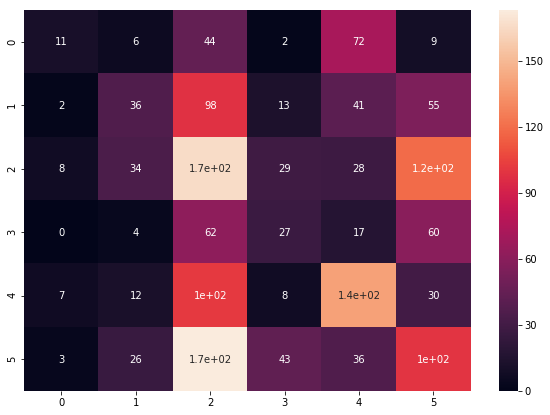

In [94]:
y_pred = np.argmax(m_v.predict(Test_visual),axis=1)
y_true = np.argmax(Test_labels,axis=1)
cm = confusion_matrix(y_true,y_pred)
df = pd.DataFrame(cm,index=["happy","sad","neutral","angry","excited","frustrate"],columns=["happy","sad","neutral","angry","excited","frustrate"])
plt.figure(figsize = (10,7),)
print("UNIMODAL VISUAL RESULTS")
sn.heatmap(cm, annot=True,xticklabels=True,yticklabels=True)

UNIMODAL AUDIO RESULTS


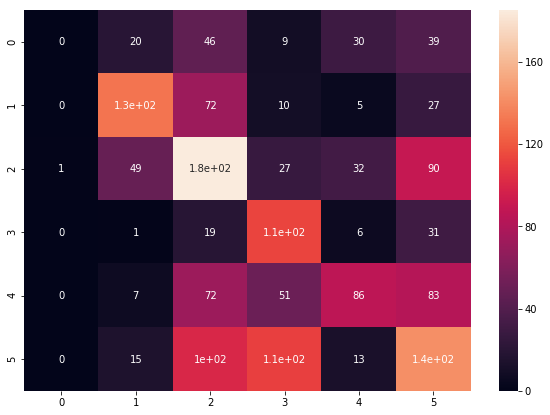

In [96]:
y_pred = np.argmax(m_a.predict(Test_audio),axis=1)
y_true = np.argmax(Test_labels,axis=1)
cm = confusion_matrix(y_true,y_pred)
df = pd.DataFrame(cm,index=["happy","sad","neutral","angry","excited","frustrate"],columns=["happy","sad","neutral","angry","excited","frustrate"])
plt.figure(figsize = (10,7),)
print("UNIMODAL AUDIO RESULTS")
sn.heatmap(cm, annot=True,xticklabels=True,yticklabels=True,)

UNIMODAL TEXT RESULTS


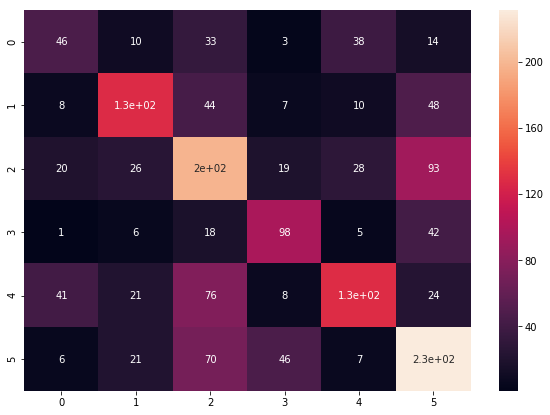

In [97]:
y_pred = np.argmax(m_t.predict(Test_text),axis=1)
y_true = np.argmax(Test_labels,axis=1)
cm = confusion_matrix(y_true,y_pred)
df = pd.DataFrame(cm,index=["happy","sad","neutral","angry","excited","frustrate"],columns=["happy","sad","neutral","angry","excited","frustrate"])
plt.figure(figsize = (10,7),)
print("UNIMODAL TEXT RESULTS")
sn.heatmap(cm, annot=True,xticklabels=True,yticklabels=True)

In [114]:
i_c = Input(shape=(712,))
y_c = Dense(128,activation='relu')(i_c)
y_c = Dense(64,activation='relu')(y_c)
y_c = Dropout(0.33)(y_c)
y_c = Dense(64,activation='relu')(y_c)
y_c = Dense(32,activation='relu')(y_c)
y_c = BatchNormalization()(y_c)
y_c = Dense(32,activation='relu')(y_c)
y_c = Dense(6,activation='softmax')(y_c)
model_c = Model(i_c,y_c)
print(model_c.summary())
model_c.compile('adam','categorical_crossentropy',metrics=['accuracy'],)
es = EarlyStopping(monitor='val_acc',mode='max' ,patience=5, min_delta=0.0001,verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.2,patience=2,min_lr=0.00001)
model_c.fit(Train_concat,Train_labels,128,epochs=20,validation_split=0.1,callbacks=[es,reduce_lr])
print(model_c.evaluate(Test_concat,Test_labels))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_92 (InputLayer)        (None, 712)               0         
_________________________________________________________________
dense_459 (Dense)            (None, 128)               91264     
_________________________________________________________________
dense_460 (Dense)            (None, 64)                8256      
_________________________________________________________________
dropout_37 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_461 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_462 (Dense)            (None, 32)                2080      
_________________________________________________________________
batch_normalization_14 (Batc (None, 32)                128       
__________

In [0]:
model_c.save("early_fusion.h5")
files.download("early_fusion.h5")

EARLY FUSION RESULTS


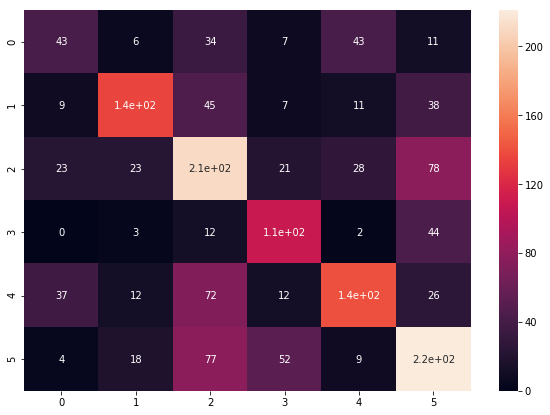

In [116]:
y_pred = np.argmax(model_c.predict(Test_concat),axis=1)
y_true = np.argmax(Test_labels,axis=1)
cm = confusion_matrix(y_true,y_pred)
df = pd.DataFrame(cm,index=["happy","sad","neutral","angry","excited","frustrate"],columns=["happy","sad","neutral","angry","excited","frustrate"])
plt.figure(figsize = (10,7),)
print("EARLY FUSION RESULTS")
sn.heatmap(cm, annot=True,xticklabels=True,yticklabels=True)

In [0]:
m_a = load_model("audio.h5")
m_t = load_model("text.h5")
m_v = load_model("visual.h5")

In [0]:
model_a = Sequential()
model_t = Sequential()
model_v = Sequential()
for layer in m_a.layers[:-1]:
    layer.trainable = False
    model_a.add(layer)
for layer in m_v.layers[:-1]:
    layer.trainable = False
    model_v.add(layer)
for layer in m_t.layers[:-1]:
    layer.trainable = False
    model_t.add(layer)
    

In [119]:
model_v.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_367 (Dense)            (None, 128)               65664     
_________________________________________________________________
dense_368 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_369 (Dense)            (None, 32)                2080      
_________________________________________________________________
dropout_29 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_370 (Dense)            (None, 32)                1056      
Total params: 77,056
Trainable params: 0
Non-trainable params: 77,056
_________________________________________________________________


In [135]:
i_a = Input(shape=(100,))
i_v = Input(shape=(512,))
i_t = Input(shape=(100,))
merged = concatenate([model_a(i_a),model_t(i_t),model_v(i_v)])
merged = Dropout(0.4)(merged)
y = Dense(6,activation='softmax')(merged)
model = Model([i_a,i_v,i_t],y)
print(model.summary())
model.compile('adam','categorical_crossentropy',metrics=['accuracy'],)
es = EarlyStopping(monitor='val_acc',mode='max' ,patience=5, min_delta=0.0001,verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.2,patience=2,min_lr=0.00001)
model.fit([Train_audio,Train_visual,Train_text],Train_labels,128,epochs=20,validation_split=0.1,callbacks=[es,reduce_lr])
print(model.evaluate([Test_audio,Test_visual,Test_text],Test_labels))

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_138 (InputLayer)          (None, 100)          0                                            
__________________________________________________________________________________________________
input_140 (InputLayer)          (None, 100)          0                                            
__________________________________________________________________________________________________
input_139 (InputLayer)          (None, 512)          0                                            
__________________________________________________________________________________________________
sequential_1 (Sequential)       (None, 32)           12704       input_138[0][0]                  
__________________________________________________________________________________________________
sequential

In [0]:
model.save("late_fusion.h5")
files.download("late_fusion.h5")

LATE FUSION RESULTS


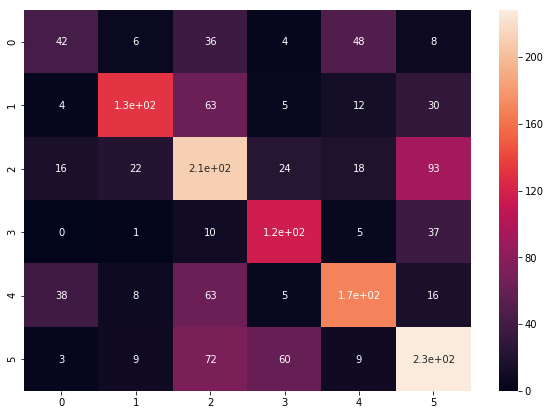

In [138]:
y_pred = np.argmax(model.predict([Test_audio,Test_visual,Test_text]),axis=1)
y_true = np.argmax(Test_labels,axis=1)
cm = confusion_matrix(y_true,y_pred)
df = pd.DataFrame(cm,index=["happy","sad","neutral","angry","excited","frustrate"],columns=["happy","sad","neutral","angry","excited","frustrate"])
plt.figure(figsize = (10,7),)
print("LATE FUSION RESULTS")
sn.heatmap(cm, annot=True,xticklabels=True,yticklabels=True)

In [0]:
m_a = load_model("audio.h5")
m_t = load_model("text.h5")
m_v = load_model("visual.h5")

In [0]:
model_a = Sequential()
model_t = Sequential()
model_v = Sequential()
for layer in m_a.layers[:]:
    layer.trainable = False
    model_a.add(layer)
for layer in m_v.layers[:]:
    layer.trainable = False
    model_v.add(layer)
for layer in m_t.layers[:]:
    layer.trainable = False
    model_t.add(layer)
    

In [146]:
model_t.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_346 (Dense)            (None, 128)               12928     
_________________________________________________________________
dense_347 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_348 (Dense)            (None, 64)                8256      
_________________________________________________________________
batch_normalization_6 (Batch (None, 64)                256       
_________________________________________________________________
dense_349 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_350 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_351 (Dense)            (None, 6)                 198       
Total para

In [0]:
def deep_fuse(out):
    o1 = out[0]     # o1.shape = (None,6)
    o2 = out[1]     # o2.shape = (None,6)
    o3 = out[2]     # o3.shape = (None,6)

    x = 1.-o1
    y = 1.-o2
    z = 1.-o3
    
    return concatenate([o1,x,o2,y,o3,z])

In [170]:
i_a = Input(shape=(100,))
i_v = Input(shape=(512,))
i_t = Input(shape=(100,))
merged = Lambda(deep_fuse)([m_a(i_a),m_v(i_v),m_t(i_t)])
y = Dense(64,activation='relu')(merged)
y = Dropout(0.15)(y)
y = Dense(32,activation='relu')(y)
y = Dense(6,activation='softmax')(y)
model = Model([i_a,i_v,i_t],y)
print(model.summary())
model.compile('adam','categorical_crossentropy',metrics=['accuracy'],)
es = EarlyStopping(monitor='val_acc',mode='max' ,patience=5, min_delta=0.0001,verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.2,patience=2,min_lr=0.00001)
model.fit([Train_audio,Train_visual,Train_text],Train_labels,128,epochs=20,validation_split=0.1,callbacks=[es,reduce_lr])
print(model.evaluate([Test_audio,Test_visual,Test_text],Test_labels))

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_198 (InputLayer)          (None, 100)          0                                            
__________________________________________________________________________________________________
input_199 (InputLayer)          (None, 512)          0                                            
__________________________________________________________________________________________________
input_200 (InputLayer)          (None, 100)          0                                            
__________________________________________________________________________________________________
model_45 (Model)                (None, 6)            12902       input_198[0][0]                  
__________________________________________________________________________________________________
model_71 (

In [0]:
model.save("deep_fusion.h5")
files.download("deep_fusion.h5")

DEEP FUSION RESULTS


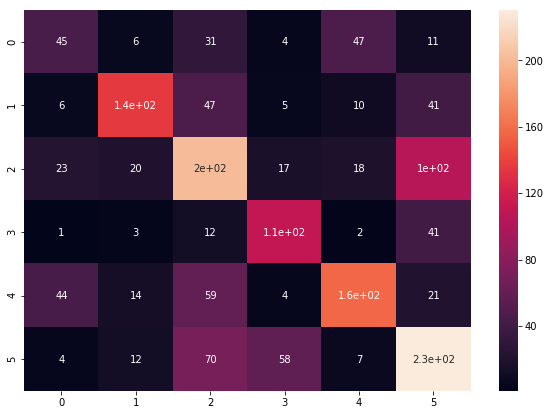

In [173]:
y_pred = np.argmax(model.predict([Test_audio,Test_visual,Test_text]),axis=1)
y_true = np.argmax(Test_labels,axis=1)
cm = confusion_matrix(y_true,y_pred)
df = pd.DataFrame(cm,index=["happy","sad","neutral","angry","excited","frustrate"],columns=["happy","sad","neutral","angry","excited","frustrate"])
plt.figure(figsize = (10,7),)
print("DEEP FUSION RESULTS")
sn.heatmap(cm, annot=True,xticklabels=True,yticklabels=True)

In [0]:
m_a = load_model("audio.h5")
m_t = load_model("text.h5")
m_v = load_model("visual.h5")

In [0]:

model_a = Sequential()
model_t = Sequential()
model_v = Sequential()
for layer in m_a.layers[:-1]:
    layer.trainable = False
    model_a.add(layer)
for layer in m_v.layers[:-1]:
    layer.trainable = False
    model_v.add(layer)
for layer in m_t.layers[:-1]:
    layer.trainable = False
    model_t.add(layer)
    

In [176]:
model_v.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_367 (Dense)            (None, 128)               65664     
_________________________________________________________________
dense_368 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_369 (Dense)            (None, 32)                2080      
_________________________________________________________________
dropout_29 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_370 (Dense)            (None, 32)                1056      
Total params: 77,056
Trainable params: 0
Non-trainable params: 77,056
_________________________________________________________________


In [0]:
def tensor_fuse(out):
	o1 = out[0]     # o1.shape = (None,32)
	o2 = out[1]     # o2.shape = (None,32)
	o3 = out[2]     # o3.shape = (None,32)

	x = tf.expand_dims(o1,1)   # x.shape = (None,1,32)
	y = tf.expand_dims(o2,2)   # y.shape = (None,32,1)
	o12 = tf.reshape(tf.multiply(x,y),shape=[-1,32*32])  # o12.shape = (None,32*32)

	x = tf.expand_dims(o2,1)   # x.shape = (None,1,32)
	y = tf.expand_dims(o3,2)   # y.shape = (None,32,1)
	o23 = tf.reshape(tf.multiply(x,y),shape=[-1,32*32])  # o23.shape = (None,32*32)

	x = tf.expand_dims(o3,1)   # x.shape = (None,1,32)
	y = tf.expand_dims(o1,2)   # y.shape = (None,32,1)
	o31 = tf.reshape(tf.multiply(x,y),shape=[-1,32*32])  # o31.shape = (None,32*32)

	x = tf.expand_dims(o12,2)  # x.shape = (None,32*32,1)
	y = tf.expand_dims(o3,1)   # y.shape = (None,1,32)
	o123 = tf.reshape(tf.multiply(x,y),[-1,32*32*32])  # o123.shape = (None,32*32*32)

	return concatenate([o1,o2,o3,o12,o23,o31,o123])


In [195]:
i_a = Input(shape=(100,))
i_v = Input(shape=(512,))
i_t = Input(shape=(100,))
merged = layers.Lambda(tensor_fuse)([model_a(i_a),model_v(i_v),model_t(i_t)])
y = Dense(1024,activation='relu')(merged)
y = Dense(256,activation='relu')(y)
y = Dense(256,activation='relu')(y)
y = Dropout(0.15)(y)
y = Dense(32,activation='relu')(y)
y = Dense(6,activation='softmax')(y)


model = Model([i_a,i_v,i_t],y)
print(model.summary())
model.compile('adam','categorical_crossentropy',metrics=['accuracy'],)
es = EarlyStopping(monitor='val_acc',mode='max' ,patience=5, min_delta=0.0001,verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.2,patience=2,min_lr=0.00001)
model.fit([Train_audio,Train_visual,Train_text],Train_labels,128,epochs=20,validation_split=0.1,callbacks=[es,reduce_lr])
print(model.evaluate([Test_audio,Test_visual,Test_text],Test_labels))

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_252 (InputLayer)          (None, 100)          0                                            
__________________________________________________________________________________________________
input_253 (InputLayer)          (None, 512)          0                                            
__________________________________________________________________________________________________
input_254 (InputLayer)          (None, 100)          0                                            
__________________________________________________________________________________________________
sequential_7 (Sequential)       (None, 32)           12704       input_252[0][0]                  
__________________________________________________________________________________________________
sequential

In [0]:
# model.save("tensor_fusion.h5")
files.download("tensor_fusion.h5")

TENSOR FUSION RESULTS


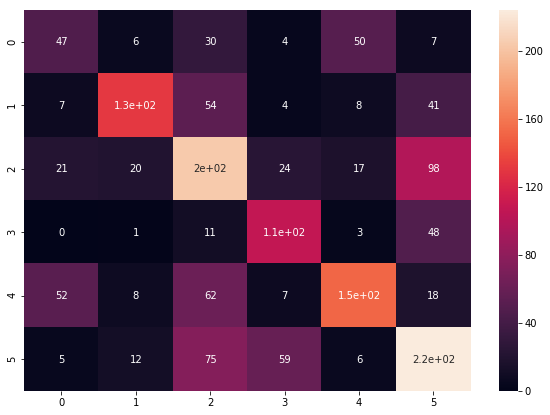

In [197]:
y_pred = np.argmax(model.predict([Test_audio,Test_visual,Test_text]),axis=1)
y_true = np.argmax(Test_labels,axis=1)
cm = confusion_matrix(y_true,y_pred)
df = pd.DataFrame(cm,index=["happy","sad","neutral","angry","excited","frustrate"],columns=["happy","sad","neutral","angry","excited","frustrate"])
plt.figure(figsize = (10,7),)
print("TENSOR FUSION RESULTS")
sn.heatmap(cm, annot=True,xticklabels=True,yticklabels=True)

In [0]:
m_a = load_model("audio.h5")
m_t = load_model("text.h5")
m_v = load_model("visual.h5")
m_lf = load_model("late_fusion.h5")

In [0]:
# model_lf = Sequential()
model_a = Sequential()
model_t = Sequential()
model_v = Sequential()
for layer in m_a.layers[:]:
    model_a.add(layer)
for layer in m_v.layers[:]:
    model_v.add(layer)
for layer in m_t.layers[:]:
    model_t.add(layer)
# for layer in m_lf.layers[:]:
#     model_lf.add(layer)
    
for layer in model_a.layers[:-1]:
    layer.trainable = False
for layer in model_v.layers[:-1]:
    layer.trainable = False
for layer in model_t.layers[:-1]:
    layer.trainable = False
# for layer in model_lf.layers[:-1]:
#     layer.trainable = False
    

In [0]:
model_lf = m_lf
for layer in m_lf.layers[:]:
    layer.trainable = False

In [208]:
model_lf.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_138 (InputLayer)          (None, 100)          0                                            
__________________________________________________________________________________________________
input_140 (InputLayer)          (None, 100)          0                                            
__________________________________________________________________________________________________
input_139 (InputLayer)          multiple             0                                            
__________________________________________________________________________________________________
sequential_1 (Sequential)       (None, 32)           12704       input_138[0][0]                  
__________________________________________________________________________________________________
sequential

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [210]:
model_v.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_367 (Dense)            (None, 128)               65664     
_________________________________________________________________
dense_368 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_369 (Dense)            (None, 32)                2080      
_________________________________________________________________
dropout_29 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_370 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_371 (Dense)            (None, 6)                 198       
Total params: 77,254
Trainable params: 198
Non-trainable params: 77,056
_________________________________________________________________


In [223]:
i_a = Input(shape=(100,))
i_v = Input(shape=(512,))
i_t = Input(shape=(100,))

y = concatenate([model_a(i_a),model_v(i_v),model_t(i_t),model_lf([i_a,i_v,i_t])])
y = Dropout(0.3)(y)
y = Dense(32)(y)
y = Dense(6,activation='softmax')(y)

model = Model([i_a,i_v,i_t],y)
print(model.summary())
model.compile('adam','categorical_crossentropy',metrics=['accuracy'],)
es = EarlyStopping(monitor='val_acc',mode='max' ,patience=5, min_delta=0.0001,verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.2,patience=2,min_lr=0.00001)
model.fit([Train_audio,Train_visual,Train_text],Train_labels,128,epochs=100,validation_split=0.1,callbacks=[es,reduce_lr])
print(model.evaluate([Test_audio,Test_visual,Test_text],Test_labels))

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_288 (InputLayer)          (None, 100)          0                                            
__________________________________________________________________________________________________
input_289 (InputLayer)          (None, 512)          0                                            
__________________________________________________________________________________________________
input_290 (InputLayer)          (None, 100)          0                                            
__________________________________________________________________________________________________
sequential_14 (Sequential)      (None, 6)            12902       input_288[0][0]                  
__________________________________________________________________________________________________
sequential

In [0]:
model.save("ensemble_lf.h5")

In [0]:
files.download("ensemble_lf.h5")

Ensemble RESULTS


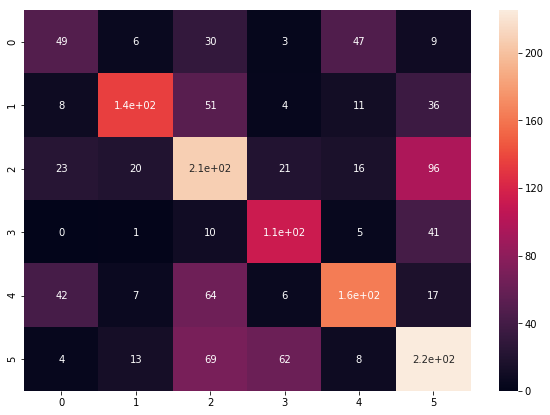

In [226]:
y_pred = np.argmax(model.predict([Test_audio,Test_visual,Test_text]),axis=1)
y_true = np.argmax(Test_labels,axis=1)
cm = confusion_matrix(y_true,y_pred)
df = pd.DataFrame(cm,index=["happy","sad","neutral","angry","excited","frustrate"],columns=["happy","sad","neutral","angry","excited","frustrate"])
plt.figure(figsize = (10,7),)
print("Ensemble RESULTS")
sn.heatmap(cm, annot=True,xticklabels=True,yticklabels=True)